## Problem Statement

As a data analyst at TechWorks Consulting, you are given the task of creating a machine
learning model which will help them in determining the salary of newly hired employees using
the given data.
You have to define your approach and then perform all the tasks required step by step to make
the prediction, and then ultimately perform predictive analysis to predict the salary.
In data preparation you have to change the college field into numerical data type with the help of
the tier of that college, similar thing you have to do with the city field and you also have to create
dummy variables for “Role”.
Try to find out the outliers and missing values and clean the data further and after the data is
ready create a predictive model to predict the salary.
You can choose any regression model but in the end you have to state your reason for choosing
that model. You can try multiple models and then pick one with the best accuracy and also state
the reason why this model performed better then the others and in what ways you can further
improve the accuracy of the selected model.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data loading and Preprocessing

In [2]:
# Loading data
df = pd.read_csv('ML case Study.csv',header=0)
college = pd.read_csv('Colleges.csv',header=0)
city = pd.read_csv('cities.csv',header=0)

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [6]:
#transforming college data to list
Tier1=college["Tier 1"].tolist()
Tier2=college["Tier 2"].tolist()
Tier3=college["Tier 3"].tolist()

In [7]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [8]:
# transforming from college name to their respective tiers
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,"Tier_1",inplace=True)
    elif item in Tier2:
        df["College"].replace(item,"Tier_2",inplace=True)
    elif item in Tier3:
        df["College"].replace(item,"Tier_3",inplace=True)

In [9]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,Tier_2,Asansol,Manager,55523.0,3,66,19,71406.58
1,Tier_2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,Tier_3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,Tier_3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,Tier_1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [10]:
#transforming city data to list
metro_city = city["Metrio City"].tolist()
non_metro_city = city["non-metro cities"].tolist()

In [11]:
metro_city

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [12]:
# transformning city names to their types
for item in df.City:
    if item in metro_city:
        df["City"].replace(item,"metro_city",inplace=True)
    if item in non_metro_city:
        df["City"].replace(item,"non_metro_city",inplace=True)

In [13]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,Tier_2,non_metro_city,Manager,55523.0,3,66,19,71406.58
1,Tier_2,non_metro_city,Executive,57081.0,1,84,18,68005.87
2,Tier_3,non_metro_city,Executive,60347.0,2,52,28,76764.02
3,Tier_3,non_metro_city,Executive,49010.0,2,81,33,82092.39
4,Tier_1,non_metro_city,Executive,57879.0,4,74,32,73878.10


In [14]:
# checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


As we can see every column has 1589 values so there are no missing values in any columns.

In [15]:
#getting dummy variables to transform data of 'City','College','Role' variables into numeric
df=pd.get_dummies(df,drop_first=True)

In [16]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier_2,College_Tier_3,City_non_metro_city,Role_Manager
0,55523.0,3,66,19,71406.58,1,0,1,1
1,57081.0,1,84,18,68005.87,1,0,1,0
2,60347.0,2,52,28,76764.02,0,1,1,0
3,49010.0,2,81,33,82092.39,0,1,1,0
4,57879.0,4,74,32,73878.10,0,0,1,0


In [17]:
df.to_csv('Preprocessed_finalProject',index=False)

### Outlier Detection

In [18]:
# Statistical description of the dataset
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier_2,College_Tier_3,City_non_metro_city,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.297042,0.339207,0.485840,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.457099,0.473589,0.499957,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000,0.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000,0.000000,0.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,1.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000


#### Conclusions from dataset description
Previous CTC: The interquartile range (IQR) is 60109.00 - 50518.00 = 9591.00.Here,lower outliers would be less than 50518.00 - 1.5 * 9591.00 = 36131.50, and upper outliers would be more than 60109.00 + 1.5 * 9591.00 = 74495.50. Since the maximum value (77911.00) exceeds 74495.50, there may be some high outliers.

CTC:The IQR is 80588.67 - 66902.35 = 13686.32. Outliers would be less than 66902.35 - 1.5 * 13686.32 = 46372.87 or more than 80588.67 + 1.5 * 13686.32 = 101118.15. Since the maximum value (123416.99) exceeds 101118.15, there may be some high outliers. But as it dependent variable we won't impute outliers and keep the data as it is.

<AxesSubplot:xlabel='Previous CTC'>

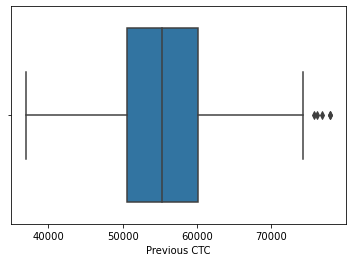

In [19]:
#using boxplot to detect outliers in 'Previous CTC' column
sns.boxplot(x='Previous CTC',data=df)

In [20]:
#finding outliers in previous ctc
ul1=np.percentile(df['Previous CTC'],[99])[0]
ul1

71506.92

In [21]:
df[df['Previous CTC']>3*ul1]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier_2,College_Tier_3,City_non_metro_city,Role_Manager


So we can see there is not any outright outlier.

### Variable declaration and splitting the dataser 80/20 for training and testing.

In [22]:
# Viewing co-relation table of the variables 
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier_2,College_Tier_3,City_non_metro_city,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.010947,0.042438,-0.004644,0.012321
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.004271,-0.050794,-0.051670,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.018419,0.012021,0.018616,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.014558,0.017427,0.023613,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,0.012346,-0.032149,0.020365,0.621311
College_Tier_2,-0.010947,0.004271,-0.018419,-0.014558,0.012346,1.000000,-0.465741,-0.022917,-0.004865
College_Tier_3,0.042438,-0.050794,0.012021,0.017427,-0.032149,-0.465741,1.000000,0.024288,-0.010706
City_non_metro_city,-0.004644,-0.051670,0.018616,0.023613,0.020365,-0.022917,0.024288,1.000000,0.048671
Role_Manager,0.012321,-0.017150,0.017858,-0.026751,0.621311,-0.004865,-0.010706,0.048671,1.000000


From the corelation table we can see there is no high co-relation between two independent variables.

Though corelation between graduation mark and dependent variable price is very low still we will use that variable in our model training

In [23]:
#creating dependent and independent variables
X = df.drop('CTC',axis=1) 
y=df['CTC']

In [24]:
#test-train-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


### First we are going to train the model using LInear Regression Method

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
#creating object
lr=LinearRegression()
#training
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred=lr.predict(X_test)

In [30]:
# Coefficient and intercept
print (f'Coeficients = {lr.coef_}\nIntercept= {lr.intercept_}')

Coeficients = [ 4.23430908e-01  3.41476154e+00  2.27645240e+00  2.44132511e+02
  1.37219395e+02 -1.04936817e+03 -4.65298639e+02  1.86105578e+04]
Intercept= 38909.30923036159


### Model Evaluation
We are going to use MSE (Mean Squared Error) and Adjusted R square value to evaluate the model.

Lower MSE values and higher Adjusted R squared values indicate a better fit of the model to the data.

In [32]:
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
r2_score(y_test,y_pred)

0.5935474362486273

As we don't have any direct function in sklearn for Adj R squared value so I am defining a function which I will use to measure it.

In [31]:
def adjusted_r2(r2):
    n=X_test.shape[0]
    p=X_test.shape[1]
    return  1 - (1 - r2) * (n - 1) / (n - p - 1)
    

In [32]:
print(f'MSE = {mean_squared_error(y_test,y_pred)}\nAdj R2 = {adjusted_r2(r2_score(y_test,y_pred))}')

MSE = 77325555.34582898
Adj R2 = 0.583024392526909


## Using Ridge Regression
first we need to standardized the independent variables.

In [33]:
from sklearn import preprocessing
# creating scelar objech which will store the scaling infformation of x variable
scaler = preprocessing.StandardScaler().fit(X_train)
#transforming x_train to x_train scale
X_train_s =scaler.transform(X_train)
#transforming x_test to x_test scale
X_test_s= scaler.transform(X_test)

I will create a range of 100 alpha values and then select the model which will provide the highest mean.

In [34]:
#importing models
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
# creating a range of 100 alpha values ranging from 10^(-2) to 10^8
param_range = np.logspace(-2,8,100)
#running iterations of the model
train_scores,test_scores = validation_curve(Ridge(),X_train_s,y_train,param_name="alpha",param_range=param_range,scoring='r2')

In [35]:
# finding the means
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1) 

In [36]:
# finding lambda value for highest R square value
# fist finding the array where test_mean is max
np.where(test_mean==max(test_mean))

(array([27]),)

In [37]:
#now finding lambda value
param_range[27]

5.336699231206307

In [38]:
#fitting ridge model according to this lambda value
#creating object
lm_r_best =Ridge(alpha=param_range[27])
#fitting
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=5.336699231206307)

In [39]:
y_pred=lm_r_best.predict(X_test_s)

In [40]:
# Coefficient and intercept
print (f'Coeficients = {lm_r_best.coef_}\nIntercept= {lm_r_best.intercept_}')

Coeficients = [ 2.80112319e+03  3.25218604e+00  3.36277315e+01  3.45946732e+03
  6.29322676e+01 -4.94549990e+02 -2.29390835e+02  7.44305521e+03]
Intercept= 75284.838245476


### Model Evaluation

In [41]:
print(f'MSE = {mean_squared_error(y_test,y_pred)}\nAdj R2 = {adjusted_r2(r2_score(y_test,y_pred))}')

MSE = 77463384.82381973
Adj R2 = 0.5822811514333809


## Using Lasso
We are going to use the same hyperparameter values as Ridge.

In [42]:
from sklearn.linear_model import Lasso
train_scores,test_scores = validation_curve(Lasso(),X_train_s,y_train,param_name="alpha",param_range=param_range,scoring='r2')

In [43]:
# finding the means
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1) 

In [44]:
np.where(test_mean==max(test_mean))

(array([41]),)

In [45]:
param_range[41]

138.48863713938718

In [46]:
#fitting ridge model according to this lambda value
#creating object
lm_l_best =Ridge(alpha=param_range[41])
#fitting
lm_l_best.fit(X_train_s,y_train)

Ridge(alpha=138.48863713938718)

In [47]:
y_pred=lm_l_best.predict(X_test_s)

In [48]:
# Coefficient and intercept
print (f'Coeficients = {lm_l_best.coef_}\nIntercept= {lm_l_best.intercept_}')

Coeficients = [2577.68987691   -9.06311491   24.80120143 3140.51008559   70.26843318
 -417.98393718 -162.75367713 6730.32209556]
Intercept= 75284.838245476


### Model Evaluation

In [49]:
print(f'MSE = {mean_squared_error(y_test,y_pred)}\nAdj R2 = {adjusted_r2(r2_score(y_test,y_pred))}')

MSE = 81305000.66123906
Adj R2 = 0.5615653597352541


## Using Random Forest with grid search

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [51]:
#creating classifier object
rf_reg=RandomForestRegressor(random_state=42)

In [52]:
#creating dictionary of hyper parameters for grid search
params_grid={'n_estimators':[100,250,500],
            'max_features':[4,5,6,7,8,9,10],
            'min_samples_split':[2,3,10]}

In [53]:
#creating grid search object
grid_search = GridSearchCV(rf_reg,params_grid,
                          n_jobs=-1,cv=5,scoring='r2')

In [54]:
#training
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='r2')

In [55]:
#finding best model
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 2, 'n_estimators': 250}

In [56]:
# storing the model
rf_reg_best = grid_search.best_estimator_

In [57]:
y_pred=rf_reg_best.predict(X_test)

### Model Evaluation

In [58]:
print(f'MSE = {mean_squared_error(y_test,y_pred)}\nAdj R2 = {adjusted_r2(r2_score(y_test,y_pred))}')

MSE = 68148629.69887327
Adj R2 = 0.6325106733465029


## Using Gradient boosting with grid search

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
rf_grad = GradientBoostingRegressor(random_state=42)

In [60]:
#creating grid search object
grid_search2 = GridSearchCV(rf_grad,params_grid,
                          n_jobs=-1,cv=5,scoring='r2')

In [62]:
#training
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='r2')

In [63]:
#finding best model
grid_search2.best_params_

{'max_features': 7, 'min_samples_split': 10, 'n_estimators': 100}

In [64]:
# storing the model
rf_grad_best = grid_search2.best_estimator_

In [65]:
y_pred=rf_grad_best.predict(X_test)

### Model Evaluation

In [66]:
print(f'MSE = {mean_squared_error(y_test,y_pred)}\nAdj R2 = {adjusted_r2(r2_score(y_test,y_pred))}')

MSE = 72358354.24190095
Adj R2 = 0.6098098671153318


## Using ADA boost with grid search

In [71]:
from sklearn.ensemble import AdaBoostRegressor
#creating classifier object
ada_reg = AdaBoostRegressor(random_state=42)

In [72]:
params_grid2={'n_estimators':[100,250,500],
              'learning_rate':[0.2,0.5,1]}

In [73]:
grid_search3 = GridSearchCV(ada_clf,params_grid2,
                          n_jobs=-1,cv=5,scoring='r2')

In [74]:
#training
grid_search3.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.5, 1],
                         'n_estimators': [100, 250, 500]},
             scoring='r2')

In [91]:
#finding best model
grid_search3.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [78]:
# storing the model
ada_reg_best = grid_search3.best_estimator_

In [79]:
y_pred=ada_reg_best.predict(X_test)

### Model Evaluation

In [80]:
print(f'MSE = {mean_squared_error(y_test,y_pred)}\nAdj R2 = {adjusted_r2(r2_score(y_test,y_pred))}')

MSE = 74521924.56442405
Adj R2 = 0.5981428826945924


####  I tried to run this model using params_grid2={'estimator':[rf_reg,rf_grad],'n_estimators':[100,250,500], 'learning_rate':[0.2,0.5,1]} but it seems my machine is not strong enough to process it.

## Using XGboost and grid search

In [81]:
import xgboost as xgb

In [95]:
xgb_reg=xgb.XGBRegressor(random_state=42)

In [96]:
param_grid3={'n_estimators':[100,250],
             'learning_rate':[0.3,0.5],
             'max_depth':range(3,10,3),
             'gamma' : [0.1,0.2,0.3],
             'subsample':[0.8,0.9],
             'colsample_bytree':[0.8,0.9],
             'reg_alpha':[ 1e-2, 0.1, 1]
            }

In [97]:
grid_search4=GridSearchCV(xgb_reg,param_grid3,n_jobs=-1,cv=5,scoring='r2')

In [98]:
grid_search4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'learning_rate': [0.3, 0.5],
                         'max_depth': range(3, 10, 3),
                         'n_estimators': [100, 250],
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='r2')

In [99]:
#finding best model
grid_search4.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_alpha': 1,
 'subsample': 0.9}

In [100]:
xgb_reg_best= grid_search4.best_estimator_

In [101]:
y_pred=xgb_reg_best.predict(X_test)

### Model Evaluation

In [102]:
print(f'MSE = {mean_squared_error(y_test,y_pred)}\nAdj R2 = {adjusted_r2(r2_score(y_test,y_pred))}')

MSE = 72517087.98573358
Adj R2 = 0.6089539004305138


## Conclusion

### Summary of all the model evaluations

### Linear Regression :
MSE = 77325555.34582898, 
Adj R2 = 0.583024392526909

### Ridge Regression
MSE = 77463384.82381973, 
Adj R2 = 0.5822811514333809

### Lasso
MSE = 81305000.66123906, 
Adj R2 = 0.5615653597352541

### Random forest with Grid search
MSE = 68148629.69887327, 
Adj R2 = 0.6325106733465029

### Gradiant Boosting with Grid search
MSE = 72358354.24190095, 
Adj R2 = 0.6098098671153318

### ADA Boost with Grid Search
MSE = 74521924.56442405, 
Adj R2 = 0.5981428826945924

### XGBoost with Grid Search
MSE = 72517087.98573358, 
Adj R2 = 0.6089539004305138

#### From the above summary we can see Random Forest with Grid Search has the best combination that is lowest MSE and highest Adj R2 value. So for this dataset this methode is most perfect among all the methodes shown here.

# To further improve the performance of selected model, I can take several steps:
- **Increase the Number of Trees (Estimators):**
    Random Forest's performance often benefits from increasing the number of decision trees (estimators) in the ensemble.
- **Tune Hyperparameters:** Perform a more thorough hyperparameter tuning by experimenting with different values for parameters like max_depth, min_samples_split, min_samples_leaf, and max_features. Grid Search or Randomized Search can help find the optimal combination of hyperparameters.
- **Feature Selection:** Consider removing or reducing the importance of less informative features to improve the model's efficiency and potentially its performance.